In [1]:
import pandas as pandas
import numpy as numpy
import networkx as nx

# Airlines data set

In [2]:
Source = pandas.read_csv("data.csv")

In [3]:
Source.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


In [4]:
Source.shape

(50000, 12)

In [5]:
df = nx.from_pandas_edgelist(Source, source='Origin', target='Dest', edge_attr=True)

In [6]:
df.node

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

In [7]:
df.edges

EdgeView([('IAD', 'TPA'), ('IAD', 'LAS'), ('IAD', 'MCO'), ('IAD', 'MDW'), ('TPA', 'IND'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('TPA', 'LAS'), ('TPA', 'MCI'), ('TPA', 'MDW'), ('TPA', 'MHT'), ('TPA', 'MSY'), ('TPA', 'ORF'), ('TPA', 'PBI'), ('TPA', 'PHL'), ('TPA', 'PHX'), ('TPA', 'PIT'), ('TPA', 'PVD'), ('TPA', 'RDU'), ('TPA', 'SAT'), ('TPA', 'SDF'), ('TPA', 'STL'), ('TPA', 'ABQ'), ('TPA', 'ALB'), ('TPA', 'AUS'), ('TPA', 'BDL'), ('TPA', 'BHM'), ('TPA', 'BNA'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'CMH'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'HOU'), ('IND', 'BWI'), ('IND', 'JAX'), ('IND', 'LAS'), ('IND', 'MCI'), ('IND', 'MCO'), ('IND', 'MDW'), ('IND', 'PHX'), ('BWI', 'ISP'), ('BWI', 'JAN'), ('BWI', 'JAX'), ('BWI', 'LAS'), ('BWI', 'LIT'), ('BWI', 'MCI'), ('BWI', 'MCO'), ('BWI', 'MDW'), ('BWI', 'MHT'), ('BWI', 'MSY'), ('BWI', 'OKC'), ('BWI', 'ORF'), ('BWI', 'PBI'), ('BWI', 'PHX'), ('BWI', 'PIT'), ('BWI', 'PVD'), ('BWI', 'RDU'), ('BWI', 'RSW'), ('BWI', 'SAN'), ('BWI', 'SAT'), ('BWI', 'SDF')

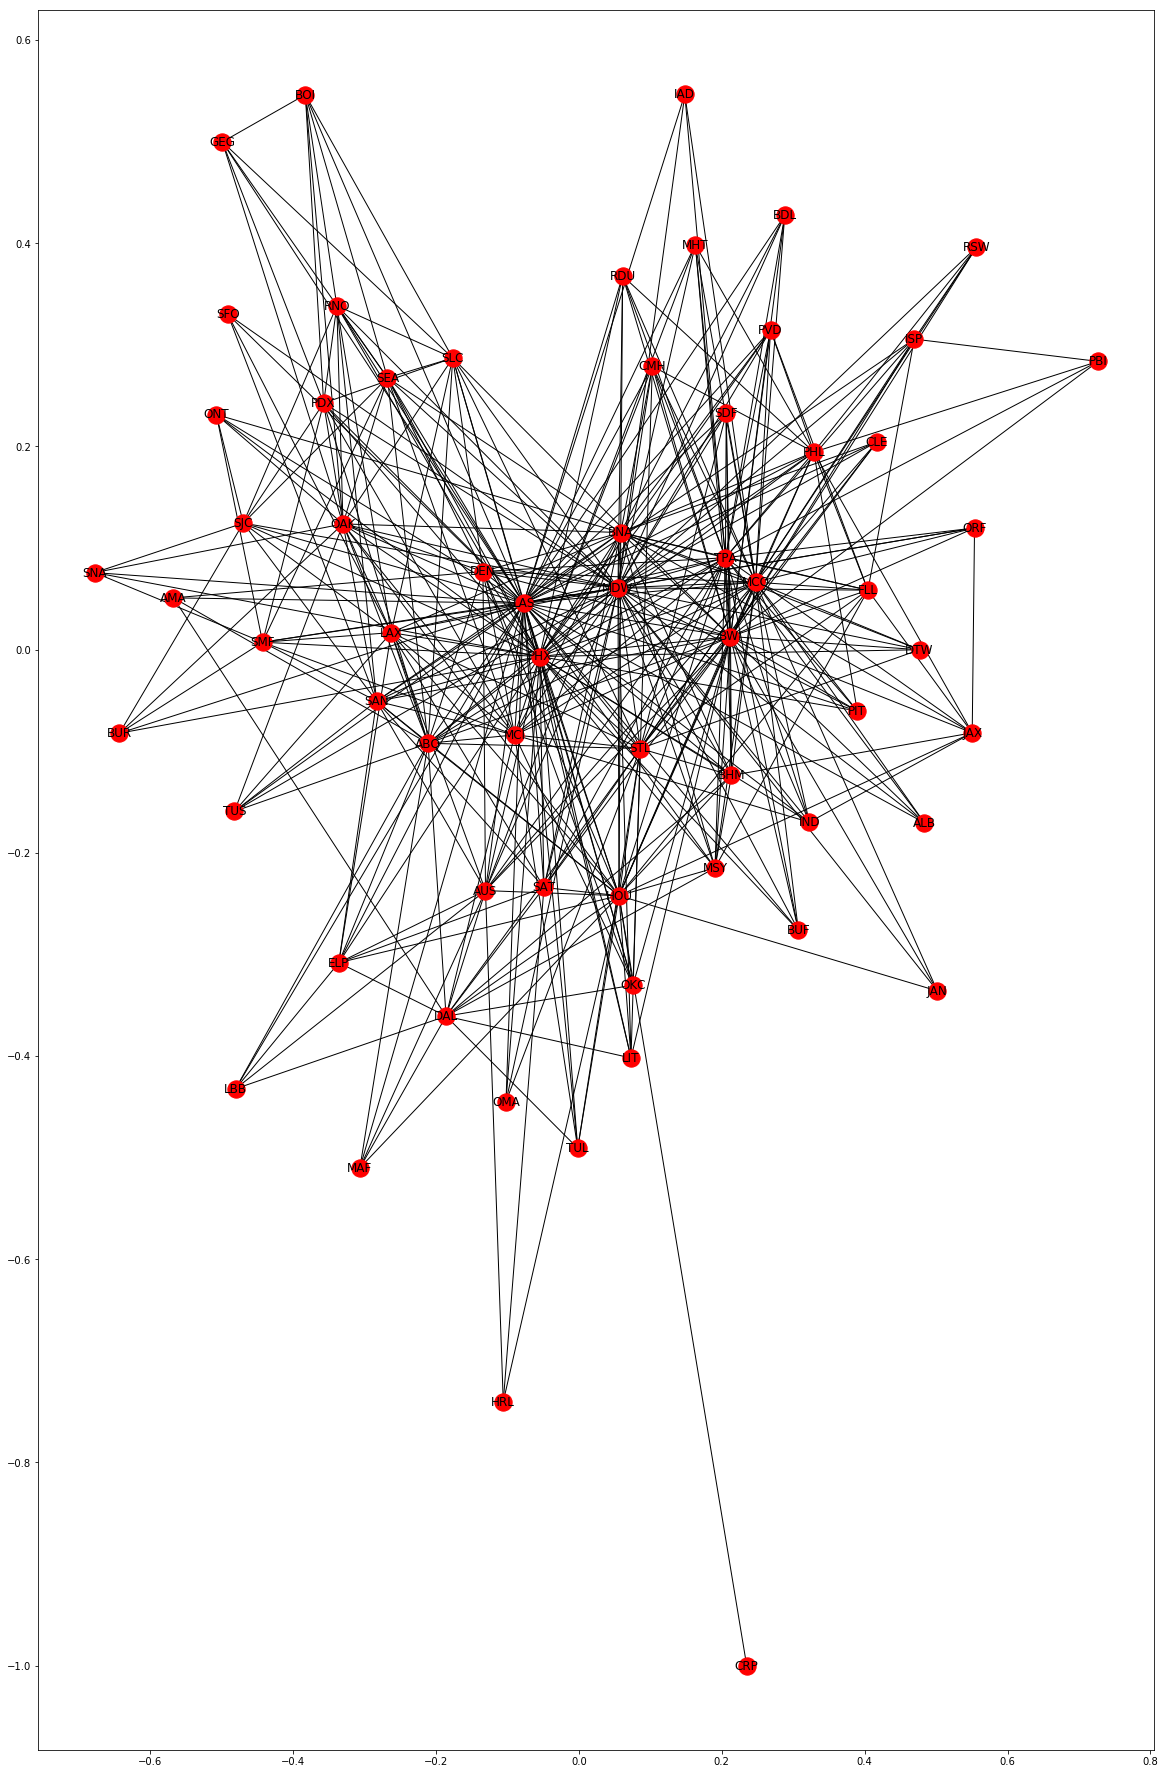

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(20,32))
nx.draw_networkx(df, with_labels=True)

In [9]:
shortest_path_distance = nx.dijkstra_path(df, source='AMA', target='PBI', weight='Distance')
shortest_path_distance

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

In [10]:
shortest_path_airtime = nx.dijkstra_path(df, source='AMA', target='PBI', weight='AirTime')
shortest_path_airtime

['AMA', 'DAL', 'BHM', 'TPA', 'PBI']

In [11]:
shortest_path_airtime = nx.dijkstra_path(df, source='ONT', target='PBI', weight='AirTime')
shortest_path_airtime

['ONT', 'LAS', 'TPA', 'PBI']

In [12]:
shortest_path_airtime = nx.dijkstra_path(df, source='PBI', target='ONT', weight='AirTime')
shortest_path_airtime

['PBI', 'TPA', 'LAS', 'ONT']

# Information Extraction using Python and spaCy

In [13]:
import re 
import string 
import nltk 
import spacy
import math 

import pandas as pandas
import numpy as numpy
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

pandas.set_option('display.max_colwidth', 200)

In [14]:
# load spaCy model
nlp = spacy.load("en_core_web_sm")

Pattern X Such as Y

In [86]:
text = "Error in the process lead to risks such as operational risks." 

# create a spaCy object 
doc = nlp(text)

In [87]:
doc

Error in the process lead to risks such as operational risks.

In [88]:
for tok in doc: 
  print(tok.text, "-->",tok.dep_,"-->", tok.pos_)

Error --> nsubj --> NOUN
in --> prep --> ADP
the --> det --> DET
process --> pobj --> NOUN
lead --> ROOT --> NOUN
to --> prep --> ADP
risks --> pobj --> NOUN
such --> amod --> ADJ
as --> prep --> SCONJ
operational --> amod --> ADJ
risks --> pobj --> NOUN
. --> punct --> PUNCT


In [89]:
pattern = [{'POS':'NOUN'},{'LOWER': 'such'},{'LOWER': 'as'},{'POS': 'ADJ'}] #proper noun]

In [90]:
pattern

[{'POS': 'NOUN'}, {'LOWER': 'such'}, {'LOWER': 'as'}, {'POS': 'ADJ'}]

In [91]:
matcher = Matcher(nlp.vocab) 

In [92]:
matcher.add("matching_1", None, pattern) 

In [93]:
matches = matcher(doc)

In [94]:
span = doc[matches[0][1]:matches[0][2]]

In [95]:
span.text

'risks such as operational'

Pattern X and/or Y

In [106]:
doc = nlp("Here is how you can keep your car and other vehicles clean.") 

# print dependency tags and POS tags
for tok in doc: 
  print(tok.text, "-->",tok.dep_, "-->",tok.pos_)

Here --> advmod --> ADV
is --> ROOT --> AUX
how --> advmod --> ADV
you --> nsubj --> PRON
can --> aux --> AUX
keep --> ccomp --> VERB
your --> poss --> PRON
car --> dobj --> NOUN
and --> cc --> CCONJ
other --> amod --> ADJ
vehicles --> nsubj --> NOUN
clean --> oprd --> ADJ
. --> punct --> PUNCT


In [107]:
pattern = [{'DEP':'amod', 'OP':"?"},{'POS':'NOUN'},{'LOWER': 'and', 'OP':"?"},{'LOWER': 'or', 'OP':"?"},{'LOWER': 'other'},
           {'POS': 'NOUN'}] 

In [108]:
matcher = Matcher(nlp.vocab) 
matcher.add("matching_1", None, pattern) 
matches = matcher(doc)

In [109]:
matches

[(11840699188806025751, 7, 11)]

In [115]:
span = doc[matches[0][1]:matches[0][2]] 
print(span.text)

car and other vehicles


# Subtree matching for relation extraction

In [132]:
text = "Risks are inevitable especially when the process is manual in nature" 

# Plot the dependency graph 
doc = nlp(text) 
displacy.render(doc, style='dep',jupyter=True)

In [133]:
for tok in doc: 
  print(tok.text,"-->",tok.dep_,"-->",tok.pos_)

Risks --> nsubj --> NOUN
are --> ROOT --> AUX
inevitable --> acomp --> ADJ
especially --> advmod --> ADV
when --> advmod --> ADV
the --> det --> DET
process --> nsubj --> NOUN
is --> advcl --> AUX
manual --> acomp --> ADJ
in --> prep --> ADP
nature --> pobj --> NOUN


In [170]:
def subtree_matcher(doc):
    x = '' 
    y = '' 
  
  # iterate through all the tokens in the input sentence 
    for i,tok in enumerate(doc):
        print(i,tok)
        # extract subject 
        if tok.dep_.find("advmod") == True:
            y = tok.text
            print(y)

        # extract object 
        if tok.dep_.endswith("obj") == True: 
            x = tok.text
            print(x)
    return x,y

In [172]:
subtree_matcher(doc)

0 Risks
1 are
2 inevitable
3 especially
4 when
5 the
6 process
7 is
8 manual
9 in
10 nature
nature


('nature', '')

In [173]:
for i,tok in enumerate(doc):
        print(i,tok)

0 Risks
1 are
2 inevitable
3 especially
4 when
5 the
6 process
7 is
8 manual
9 in
10 nature


# Build Knowledge graph using Spacy

In [174]:
Source = pandas.read_csv("wiki_sentences_v2.csv")

In [176]:
Source.head()

,sentence
0,"confused and frustrated, connie decides to leave on her own."
1,"later, a woman’s scream is heard in the distance."
2,christian is then paralyzed by an elder.
3,the temple is set on fire.
4,"outside, the cult wails with him."


In [177]:
Source.shape

(4318, 1)

In [180]:
doc = nlp("confused and frustrated, connie decides to leave on her own.")

for tok in doc:
  print(tok.text, "-->", tok.dep_)

confused --> advcl
and --> cc
frustrated --> conj
, --> punct
connie --> nsubj
decides --> ROOT
to --> aux
leave --> xcomp
on --> prep
her --> poss
own --> pobj
. --> punct


In [181]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [182]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [184]:
entity_pairs = []

for i in tqdm(Source["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 4318/4318 [00:29<00:00, 144.51it/s]


In [185]:
entity_pairs

[['connie', 'own'],
 ['later  woman', '’s distance'],
 ['christian', 'then  elder'],
 ['temple', 'fire'],
 ['outside  cult', 'him'],
 ['it', 'religious  awakening'],
 ['c. mackenzie', 'craig cast'],
 ['later craig di francia', 'action cast'],
 ['sebastian  maniscalco', 'later paul ben cast'],
 ['we', 'just  film'],
 ['we', 'tests'],
 ['m global', 'international sales rights'],
 ['musician robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['military  forces', 'arrest'],
 ['train', 'vuk'],
 ['kota eberhardt', 'selene  gallio'],
 ['singer', 'sequel'],
 ['last  which', 'penn'],
 ['jessica chastain', 'same  character'],
 ['mauro fiore', ''],
 ['filming', 'october'],
 ['soundtrack', 'digitally  june'],
 ['album', 'digitally  august'],
 ['film', 'studios motion pictures'],
 ['it', '$  million'],
 ['', ''],
 ['it', 'executive producer yoshimitsu banno'],
 ['vivienne graham', 'former employee dr'],
 ['zero aw

In [186]:
entity_pairs[10:20]

[['we', 'tests'],
 ['m global', 'international sales rights'],
 ['musician robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['military  forces', 'arrest'],
 ['train', 'vuk'],
 ['kota eberhardt', 'selene  gallio'],
 ['singer', 'sequel']]

In [188]:
def get_relation(sent):
    doc = nlp(sent)

  # Matcher class object 
    matcher = Matcher(nlp.vocab)

  #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [189]:
get_relation("John completed the task")

'completed'

In [192]:
relations = [get_relation(i) for i in tqdm(Source['sentence'])]


 54%|█████▍    | 2340/4318 [00:16<00:14, 135.30it/s]


100%|██████████| 4318/4318 [00:30<00:00, 142.97it/s]


In [195]:
pandas.Series(relations).value_counts()[:50]

is               371
was              297
released on       92
are               74
include           73
were              65
released          40
composed by       35
's                34
have              31
has               30
became            30
become            28
released in       27
included          26
called            22
produced          22
been              21
considered        20
made              20
had               20
stars             18
be                18
scheduled         17
used              17
directed by       16
written by        15
received          15
set               14
hired             14
wrote             13
went              13
introduced in     13
produced by       13
wanted            12
sold              12
began in          11
began             11
won               11
cast as           11
includes          10
gave              10
features          10
shot in            9
produced in        9
opened             9
said               9
directed     

In [197]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pandas.DataFrame({'source':source, 'target':target, 'edge':relations})

In [201]:
kg_df.to_csv("Knowledge_graph_Wiki.csv")

In [199]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

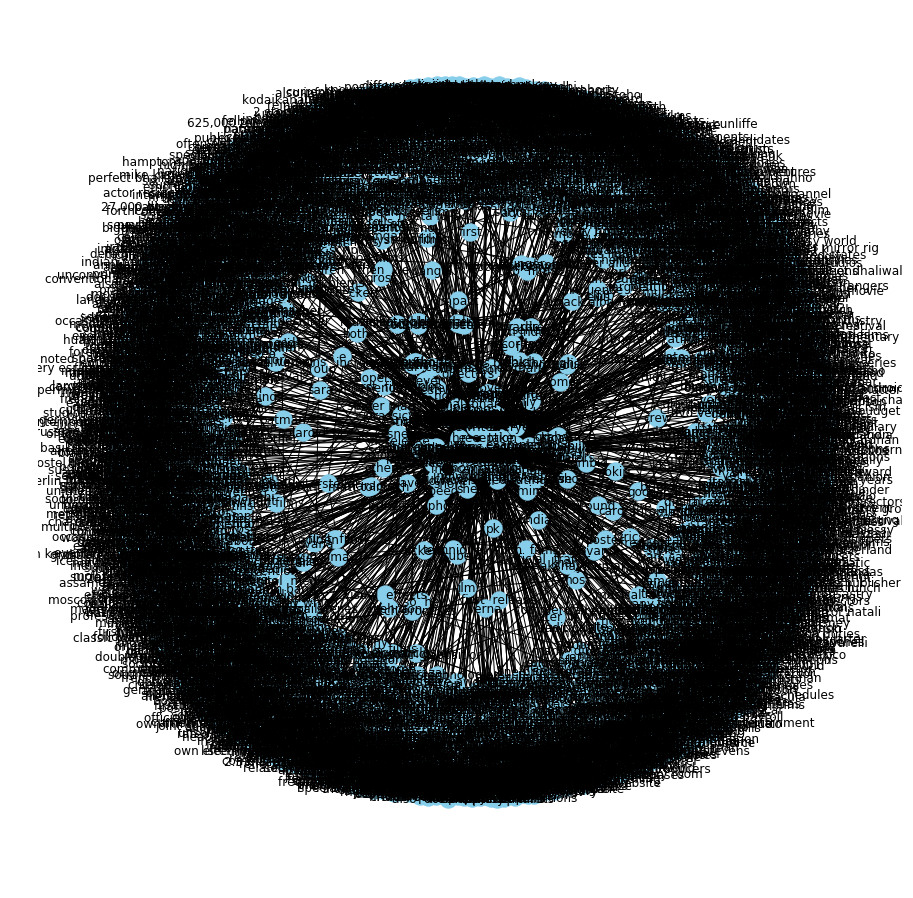

In [200]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()